# less social factors for now
* Focus on NE region of US counties so that climate is about the same but difference is more social factors
* Merge data and explore to see patterns if any
# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import os
import matplotlib.pyplot as plt
import klib

from IPython.core.display import display

# pd.set_option('display.max_columns', None)
# pd.reset_optio('max_rows')
#np.set_printoptions(threshold=sys.maxsize)

plt.style.use('dark_background')
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
sns.set(style='ticks', context='talk')

# Load data and constants

In [2]:
avg_NE_aqi_2017_2019 = pd.read_csv('../../data/processed/clean_avg_NE_aqi_2017_2019')

NE_dem_ratio_2017_2019 = pd.read_csv('../../data/processed/clean_NE_dem_ratio_2017_2019.csv')

NE_unemploy_rate_2017_2019 = pd.read_csv('../../data/processed/clean_NE_unemploy_rate_2017_2019.csv')

NE_pov_ratio_2017_2019 = pd.read_csv('../../data/processed/clean_NE_pov_rate_2017_2019.csv')

NE_educ_vehicle_2017_2019 = pd.read_csv('../../data/processed/clean_NE_edu_vehicle_2017_2019.csv')

In [3]:
def remove_col(df, col_name):
    '''Returns a dataframe with removed column or columns from old dataframe'''
    new_df = df.copy()

    if(type(col_name) != str and len(col_name) > 1):
        for index in col_name:
            new_df = new_df.drop(str(index), axis=1)
    else:
        new_df = new_df.drop(str(col_name), axis=1)
    return new_df

* have all data for 2017 all compiled together merged columns
* then repeat for 2018 and 2019 data

In [4]:
display(avg_NE_aqi_2017_2019)
display(NE_unemploy_rate_2017_2019)
display(NE_pov_ratio_2017_2019)
display(NE_educ_vehicle_2017_2019)
display(NE_dem_ratio_2017_2019)

,GeoFIPS,State Name,county Name,AQI_2017,AQI_2018,AQI_2019
0,9001,Connecticut,Fairfield,46.315068,47.904110,46.495890
1,9003,Connecticut,Hartford,43.202740,40.594521,41.490411
2,9005,Connecticut,Litchfield,38.250689,38.449036,38.564384
3,9007,Connecticut,Middlesex,44.028986,43.875000,44.487805
4,9009,Connecticut,New Haven,44.789041,45.509589,46.090411
...,...,...,...,...,...,...
146,44009,Rhode Island,Washington,33.433702,33.290859,32.991477
147,50003,Vermont,Bennington,36.271978,36.186301,35.994521
148,50007,Vermont,Chittenden,35.632877,38.520548,37.457534
149,50021,Vermont,Rutland,38.172603,38.780822,38.273973


,GeoFIPS,Stabr,area_name,Unemployment_rate_2017,Unemployment_rate_2018,Unemployment_rate_2019
0,9001,CT,"Fairfield County, CT",4.6,4.0,3.6
1,9003,CT,"Hartford County, CT",4.9,4.3,3.9
2,9005,CT,"Litchfield County, CT",4.4,3.9,3.5
3,9007,CT,"Middlesex County, CT",4.1,3.5,3.2
4,9009,CT,"New Haven County, CT",5.1,4.4,3.9
...,...,...,...,...,...,...
239,50019,VT,"Orleans County, VT",5.0,4.3,4.2
240,50021,VT,"Rutland County, VT",3.4,3.0,2.8
241,50023,VT,"Washington County, VT",2.9,2.5,2.3
242,50025,VT,"Windham County, VT",3.0,2.7,2.6


,GeoFIPS,Postal Code,Name,"Poverty Percent, All Ages 2017","Poverty Percent, All Ages 2018","Poverty Percent, All Ages 2019"
0,9001,CT,Fairfield County,8.8,10.0,9.0
1,9003,CT,Hartford County,11.0,11.2,10.8
2,9005,CT,Litchfield County,6.9,6.9,7.1
3,9007,CT,Middlesex County,6.8,6.7,7.0
4,9009,CT,New Haven County,11.0,11.6,12.0
...,...,...,...,...,...,...
238,50019,VT,Orleans County,15.2,12.2,12.7
239,50021,VT,Rutland County,10.8,10.4,10.8
240,50023,VT,Washington County,9.4,10.8,8.4
241,50025,VT,Windham County,11.6,12.0,11.6


,GeoFIPS,NAME,state,county,EDU_TOT_ratio_2017,LESS_HS_TOT_ratio_2017,HS_TOT_ratio_2017,COL_OR_ASSOC_TOT_ratio_2017,BACH_TOT_ratio_2017,GRAD_TOT_ratio_2017,...,BACH_TOT_ratio_2018,GRAD_TOT_ratio_2018,VEHICLE_TOT_ratio_2018,EDU_TOT_ratio_2019,LESS_HS_TOT_ratio_2019,HS_TOT_ratio_2019,COL_OR_ASSOC_TOT_ratio_2019,BACH_TOT_ratio_2019,GRAD_TOT_ratio_2019,VEHICLE_TOT_ratio_2019
0,36089,"St. Lawrence County, New York",36,89,66.185928,8.359560,23.588116,18.327358,7.552247,8.358647,...,7.361611,7.866947,35.461420,67.044737,8.564136,23.762762,19.480230,8.060145,7.177464,31.232597
1,36091,"Saratoga County, New York",36,91,71.525086,4.635684,16.980541,19.820419,16.481561,13.606880,...,16.692083,13.376173,46.076042,72.095118,4.492676,17.754924,19.172290,17.466056,13.209172,45.281320
2,36093,"Schenectady County, New York",36,93,69.072735,6.482821,20.662745,22.667695,11.062900,8.196574,...,11.787576,10.642420,38.725459,70.183324,5.047682,20.198456,20.343982,14.569959,10.023245,38.615831
3,36101,"Steuben County, New York",36,101,70.638028,6.761459,26.921199,21.483990,7.738806,7.732574,...,8.302017,9.023341,38.738569,71.044989,6.093585,25.791841,21.817171,8.456788,8.885604,37.225175
4,36103,"Suffolk County, New York",36,103,69.456038,6.873693,18.559191,18.702062,13.936407,11.384685,...,13.946120,11.819717,41.403545,70.148605,6.397598,18.389192,18.517663,14.495114,12.349037,42.622211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,36079,"Putnam County, New York",36,79,71.933993,5.124694,20.737392,18.218338,15.030758,12.822810,...,16.365328,13.018242,40.700967,73.443857,5.721115,19.355167,20.396664,15.500407,12.470504,43.144833
153,36081,"Queens County, New York",36,81,71.878018,12.930820,20.936054,15.809711,14.245424,7.956009,...,15.182197,8.990191,17.077931,72.484558,12.328372,19.812340,16.300805,14.831103,9.211938,17.209159
154,36083,"Rensselaer County, New York",36,83,69.525175,5.694269,19.865767,21.884274,12.611287,9.469578,...,13.420554,8.401801,42.175211,70.327759,5.902441,19.919478,19.870963,13.165820,11.469058,41.341659
155,36085,"Richmond County, New York",36,85,69.678470,8.140650,21.009139,17.452832,13.788069,9.287779,...,14.675154,9.263113,26.658042,70.041143,7.701258,20.426427,16.545240,15.103446,10.264773,27.038096


,GeoFIPS,STNAME,CTYNAME,TOT_POP_2017,TOT_MALE_ratio_2017,TOT_FEMALE_ratio_2017,WA_MALE_ratio_2017,WA_FEMALE_ratio_2017,BA_MALE_ratio_2017,BA_FEMALE_ratio_2017,...,HWAC_MALE_ratio_2019,HWAC_FEMALE_ratio_2019,HBAC_MALE_ratio_2019,HBAC_FEMALE_ratio_2019,HIAC_MALE_ratio_2019,HIAC_FEMALE_ratio_2019,HAAC_MALE_ratio_2019,HAAC_FEMALE_ratio_2019,HNAC_MALE_ratio_2019,HNAC_FEMALE_ratio_2019
0,9001,Connecticut,Fairfield County,943038,48.698144,51.301856,38.829612,40.207712,5.820020,6.748509,...,9.077186,8.966514,1.128341,1.183995,0.319082,0.286113,0.119788,0.099647,0.077173,0.059682
1,9003,Connecticut,Hartford County,893076,48.577389,51.422611,36.713113,38.908671,7.458828,8.052954,...,7.626834,7.970103,1.458642,1.633585,0.303234,0.315458,0.137711,0.124815,0.069304,0.052819
2,9005,Connecticut,Litchfield County,181667,49.403029,50.596971,46.221383,47.592023,1.153209,0.968806,...,3.141965,3.005551,0.454714,0.417561,0.167468,0.144732,0.053789,0.051017,0.030499,0.022736
3,9007,Connecticut,Middlesex County,162942,48.714266,51.285734,43.542488,45.679444,2.628543,2.723055,...,2.782019,2.829422,0.419858,0.471570,0.088035,0.112044,0.056022,0.052944,0.029550,0.032013
4,9009,Connecticut,New Haven County,857748,48.214627,51.785373,37.804577,40.195955,6.927792,7.800659,...,8.058080,8.240939,1.302943,1.452343,0.285812,0.297628,0.097104,0.095115,0.048786,0.047733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,50019,Vermont,Orleans County,26811,50.199545,49.800455,48.375667,48.054903,0.477416,0.309574,...,0.828494,0.702741,0.073973,0.070274,0.059178,0.051781,0.022192,0.018493,0.011096,0.007397
241,50021,Vermont,Rutland County,59006,49.347524,50.652476,47.701929,48.906891,0.415212,0.250822,...,0.740664,0.704576,0.089361,0.044680,0.054991,0.049836,0.024059,0.015466,0.006874,0.005155
242,50023,Vermont,Washington County,58253,49.453247,50.546753,47.386401,48.524540,0.573361,0.374230,...,0.919379,0.910819,0.089027,0.051362,0.068483,0.053074,0.018833,0.020545,0.006848,0.000000
243,50025,Vermont,Windham County,42851,49.002357,50.997643,46.542671,48.425941,0.828452,0.576416,...,1.162901,1.025532,0.118422,0.146843,0.073421,0.066316,0.033158,0.028421,0.011842,0.004737


In [5]:
# try to make a new category for aqi having levels
#
# avg_NE_aqi_2017_2019
# aqi_level = []
#
# for aqi in avg_NE_aqi_2017_2019['AQI_2017'].values:
#     if(aqi <= 50):
#         aqi_level.append(1)
#     elif(aqi <= 100):
#         aqi_level.append(2)
#     elif(aqi <= 150):
#         aqi_level.append(3)
#     elif(aqi <= 200):
#         aqi_level.append(4)
#     elif(aqi <= 300):
#         aqi_level.append(5)
#     else:
#         aqi_level.append(6)
# aqi_level
#
# avg_NE_aqi_2017_2019.insert(4, 'aqi_level_2017', aqi_level)
# avg_NE_aqi_2017_2019

level 1 = 0-50 good
level 2 = 51-100 moderate
level 3 = 101-150 unhealthy for sensitive groups
level 4 = 151-200 unhealthy
level 5 = 201-300 very unhealthy
level 6 = 300+ hazardous

## Try make one df of 2017
* Cleaning for datasets were done in Data_Wrangling4 and Data_Wrangling7 files
* So only transforming datasets into one will work

In [6]:
avg_NE_aqi_2017 = avg_NE_aqi_2017_2019.iloc[:,:4]
NE_unemploy_rate_2017 = NE_unemploy_rate_2017_2019.iloc[:, [0, 3]]
NE_pov_ratio_2017 = NE_pov_ratio_2017_2019.iloc[:, [0, 3]]

educ_vehicle_2017_col = list(NE_educ_vehicle_2017_2019.columns[0:1]) + list(NE_educ_vehicle_2017_2019.columns[4:11])
NE_educ_vehicle_2017 = NE_educ_vehicle_2017_2019.loc[:, educ_vehicle_2017_col]

dem_ratio_2017_col = list(NE_dem_ratio_2017_2019.columns[0:1]) + list(NE_dem_ratio_2017_2019.columns[3:76])
NE_dem_ratio_2017 = NE_dem_ratio_2017_2019.loc[:, dem_ratio_2017_col]

In [7]:
NE_avg_aqi_unemploy_2017 = pd.merge(avg_NE_aqi_2017, NE_unemploy_rate_2017, how='inner')
NE_avg_aqi_unemploy_pov_2017 = pd.merge(NE_avg_aqi_unemploy_2017, NE_pov_ratio_2017, how='inner')
NE_avg_aqi_unemploy_pov_educ_veh_2017 = pd.merge(NE_avg_aqi_unemploy_pov_2017, NE_educ_vehicle_2017, how='inner')
df_2017 = pd.merge(NE_avg_aqi_unemploy_pov_educ_veh_2017, NE_dem_ratio_2017, how='inner')

df_2017

,GeoFIPS,State Name,county Name,AQI_2017,Unemployment_rate_2017,"Poverty Percent, All Ages 2017",EDU_TOT_ratio_2017,LESS_HS_TOT_ratio_2017,HS_TOT_ratio_2017,COL_OR_ASSOC_TOT_ratio_2017,...,HWAC_MALE_ratio_2017,HWAC_FEMALE_ratio_2017,HBAC_MALE_ratio_2017,HBAC_FEMALE_ratio_2017,HIAC_MALE_ratio_2017,HIAC_FEMALE_ratio_2017,HAAC_MALE_ratio_2017,HAAC_FEMALE_ratio_2017,HNAC_MALE_ratio_2017,HNAC_FEMALE_ratio_2017
0,9001,Connecticut,Fairfield,46.315068,4.6,8.8,68.187249,7.514730,14.575317,13.950844,...,8.771863,8.578764,1.047678,1.109499,0.298079,0.263828,0.113781,0.094164,0.076773,0.055883
1,9003,Connecticut,Hartford,43.202740,4.9,11.0,69.832855,7.451853,18.925873,17.087453,...,7.358612,7.653212,1.394618,1.551380,0.293480,0.299639,0.128544,0.121266,0.068415,0.050612
2,9005,Connecticut,Litchfield,38.250689,4.4,6.9,74.879924,5.500145,21.216180,20.819313,...,2.739078,2.630637,0.390825,0.361100,0.142569,0.131559,0.040183,0.039633,0.030826,0.019816
3,9007,Connecticut,Middlesex,44.028986,4.1,6.8,73.032250,3.989352,20.758827,19.276054,...,2.658001,2.714463,0.386641,0.427146,0.088375,0.102490,0.055848,0.054007,0.025162,0.025162
4,9009,Connecticut,New Haven,44.789041,5.1,11.0,69.599679,6.457780,21.765386,17.591218,...,7.649333,7.797512,1.208747,1.338155,0.262198,0.275372,0.093034,0.090236,0.044419,0.045701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,42133,Pennsylvania,York,44.241096,4.3,9.4,69.669654,7.209501,26.845081,18.014114,...,3.045227,2.871708,0.733809,0.703953,0.159153,0.140521,0.052303,0.054098,0.024692,0.024243
122,44003,Rhode Island,Kent,31.326648,4.0,8.5,73.798852,6.787372,19.976185,22.308867,...,2.093639,2.117486,0.344863,0.296558,0.124738,0.116789,0.058089,0.066038,0.036688,0.017732
123,44007,Rhode Island,Providence,43.060274,4.7,14.7,68.346625,9.915322,22.943499,15.874777,...,9.005251,8.808762,2.077334,2.185199,0.602400,0.607920,0.165739,0.158169,0.115434,0.117641
124,44009,Rhode Island,Washington,33.433702,4.0,8.9,67.994451,3.851764,15.865240,18.843440,...,1.298352,1.418687,0.184461,0.183669,0.127460,0.135377,0.041959,0.041959,0.015834,0.016625


* df_2017 contains data on NorthEastern counties of the US
* The columns of df_2017 go from average aqi, unemployment rate, poverty rate, education attainment ratio, total vehicle ratio, demographic ratios


<AxesSubplot:title={'center':'Feature-correlation (spearman)'}>

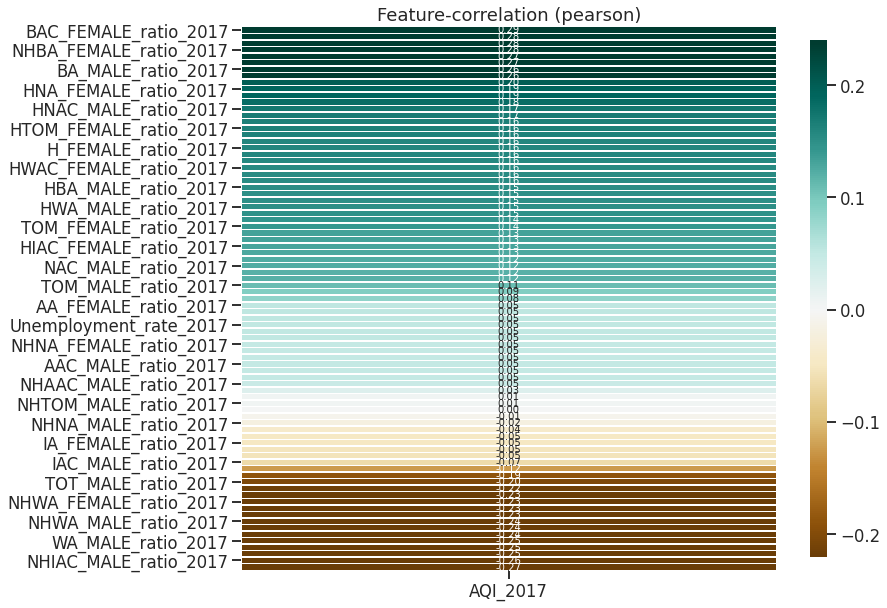

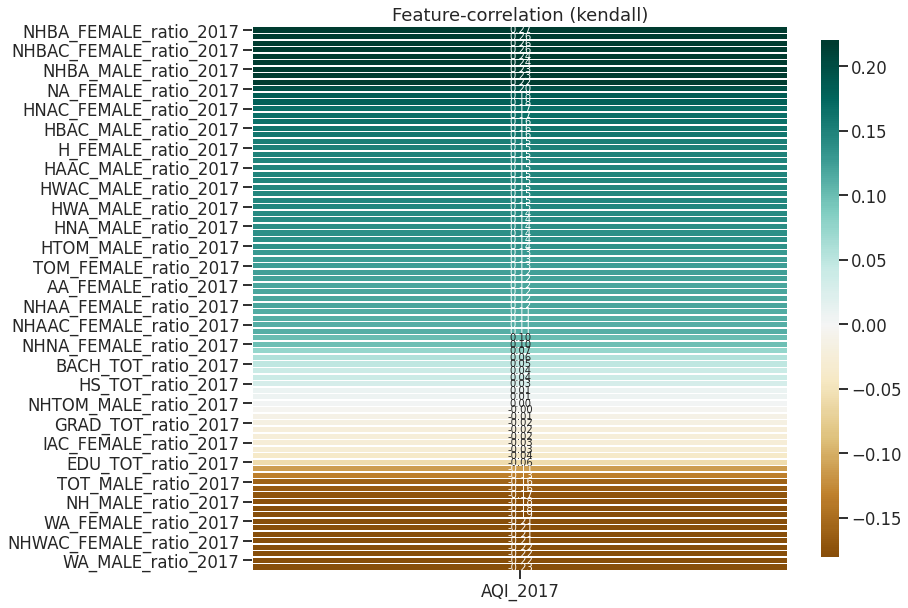

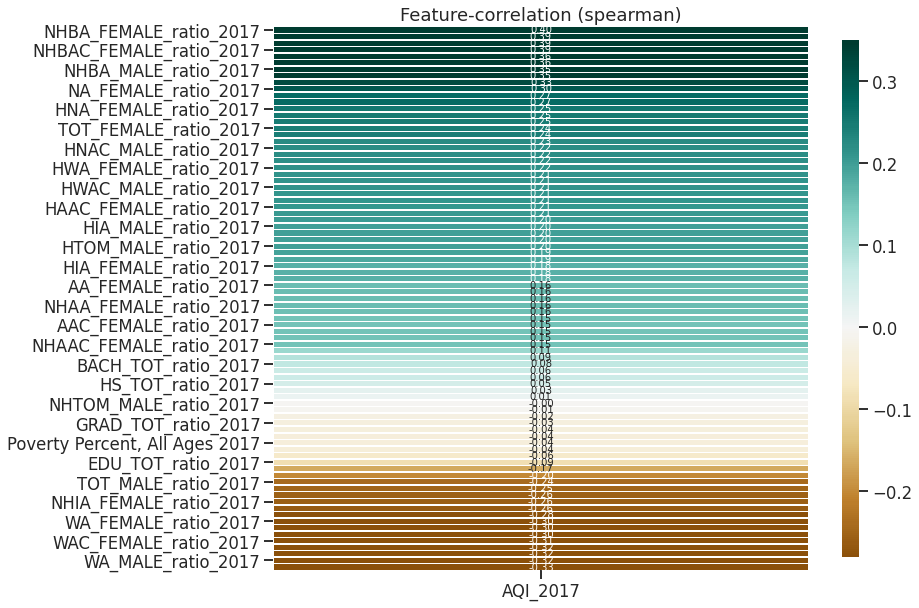

In [8]:
klib.corr_plot(df_2017, target='AQI_2017', method='pearson')
klib.corr_plot(df_2017, target='AQI_2017', method='kendall')
klib.corr_plot(df_2017, target='AQI_2017', method='spearman')

## Try make one df of 2018
* Cleaning for datasets were done in Data_Wrangling4 and Data_Wrangling7 files
* So only transforming datasets into one will work

In [9]:
avg_NE_aqi_2018 = avg_NE_aqi_2017_2019.iloc[:,[0, 1, 2, 4]]
NE_unemploy_rate_2018 = NE_unemploy_rate_2017_2019.iloc[:, [0, 4]]
NE_pov_ratio_2018 = NE_pov_ratio_2017_2019.iloc[:, [0, 4]]

educ_vehicle_2018_col = list(NE_educ_vehicle_2017_2019.columns[0:1]) + list(NE_educ_vehicle_2017_2019.columns[11:18])
NE_educ_vehicle_2018 = NE_educ_vehicle_2017_2019.loc[:, educ_vehicle_2018_col]

dem_ratio_2018_col = list(NE_dem_ratio_2017_2019.columns[0:1]) + list(NE_dem_ratio_2017_2019.columns[76:149])
NE_dem_ratio_2018 = NE_dem_ratio_2017_2019.loc[:, dem_ratio_2018_col]

In [10]:
NE_avg_aqi_unemploy_2018 = pd.merge(avg_NE_aqi_2018, NE_unemploy_rate_2018, how='inner')
NE_avg_aqi_unemploy_pov_2018 = pd.merge(NE_avg_aqi_unemploy_2018, NE_pov_ratio_2018, how='inner')
NE_avg_aqi_unemploy_pov_educ_veh_2018 = pd.merge(NE_avg_aqi_unemploy_pov_2018, NE_educ_vehicle_2018, how='inner')
df_2018 = pd.merge(NE_avg_aqi_unemploy_pov_educ_veh_2018, NE_dem_ratio_2018, how='inner')

df_2018

,GeoFIPS,State Name,county Name,AQI_2018,Unemployment_rate_2018,"Poverty Percent, All Ages 2018",EDU_TOT_ratio_2018,LESS_HS_TOT_ratio_2018,HS_TOT_ratio_2018,COL_OR_ASSOC_TOT_ratio_2018,...,HWAC_MALE_ratio_2018,HWAC_FEMALE_ratio_2018,HBAC_MALE_ratio_2018,HBAC_FEMALE_ratio_2018,HIAC_MALE_ratio_2018,HIAC_FEMALE_ratio_2018,HAAC_MALE_ratio_2018,HAAC_FEMALE_ratio_2018,HNAC_MALE_ratio_2018,HNAC_FEMALE_ratio_2018
0,9001,Connecticut,Fairfield,47.904110,4.0,10.0,68.425330,6.789621,14.095440,14.450485,...,8.943071,8.786817,1.085838,1.145798,0.307001,0.280199,0.118542,0.098944,0.075426,0.059536
1,9003,Connecticut,Hartford,40.594521,4.3,11.2,69.960916,6.899990,18.702090,17.421925,...,7.534003,7.856327,1.422730,1.596496,0.301149,0.312801,0.132425,0.121446,0.070806,0.051872
2,9005,Connecticut,Litchfield,38.449036,3.9,6.9,74.253911,4.861659,23.362468,21.413940,...,2.973577,2.829454,0.425191,0.387642,0.155719,0.137497,0.043071,0.046937,0.025401,0.023744
3,9007,Connecticut,Middlesex,43.875000,3.5,6.7,73.226909,3.366691,15.982100,21.020764,...,2.716891,2.783815,0.400319,0.444526,0.098852,0.107448,0.049733,0.054031,0.024559,0.025173
4,9009,Connecticut,New Haven,45.509589,4.4,11.6,69.838273,6.730487,22.079359,16.543224,...,7.905402,8.066201,1.249050,1.394563,0.274688,0.284257,0.096736,0.095686,0.047143,0.046909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,42133,Pennsylvania,York,41.961644,3.8,8.8,69.587952,6.934167,27.230505,17.605120,...,3.207792,3.067565,0.766780,0.733956,0.162556,0.150944,0.055823,0.056046,0.026348,0.026795
122,44003,Rhode Island,Kent,33.158192,3.6,7.8,73.650228,6.121042,18.945326,23.457687,...,2.246225,2.240130,0.368174,0.324285,0.145075,0.134103,0.065832,0.069490,0.048155,0.022554
123,44007,Rhode Island,Providence,44.953425,4.3,16.1,68.829274,9.079147,22.186850,17.875312,...,9.290167,9.067074,2.132653,2.241296,0.609621,0.622652,0.172854,0.159195,0.118533,0.121359
124,44009,Rhode Island,Washington,33.290859,3.5,8.0,69.131947,3.864351,15.665047,16.862552,...,1.364029,1.474262,0.187951,0.173676,0.132438,0.119749,0.038066,0.042031,0.013482,0.019033


* df_2018 contains data on NorthEastern counties of the US
* The columns of df_2018 go from average aqi, unemployment rate, poverty rate, education attainment ratio, total vehicle ratio, demographic ratios

<AxesSubplot:title={'center':'Feature-correlation (spearman)'}>

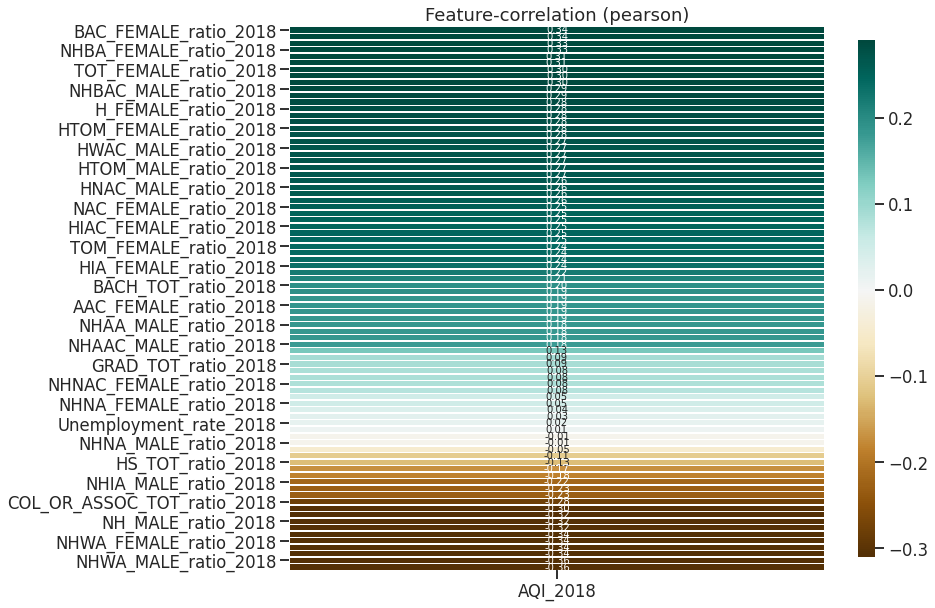

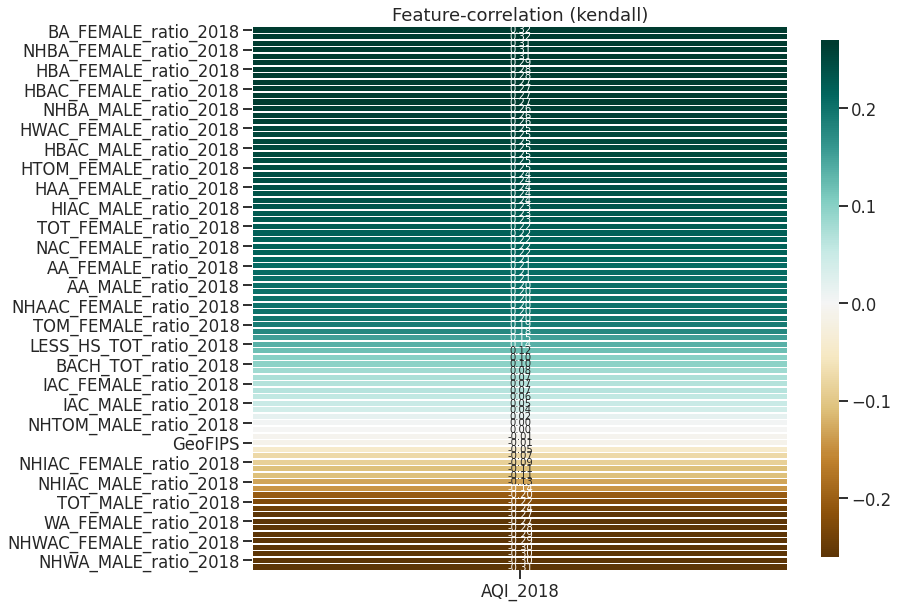

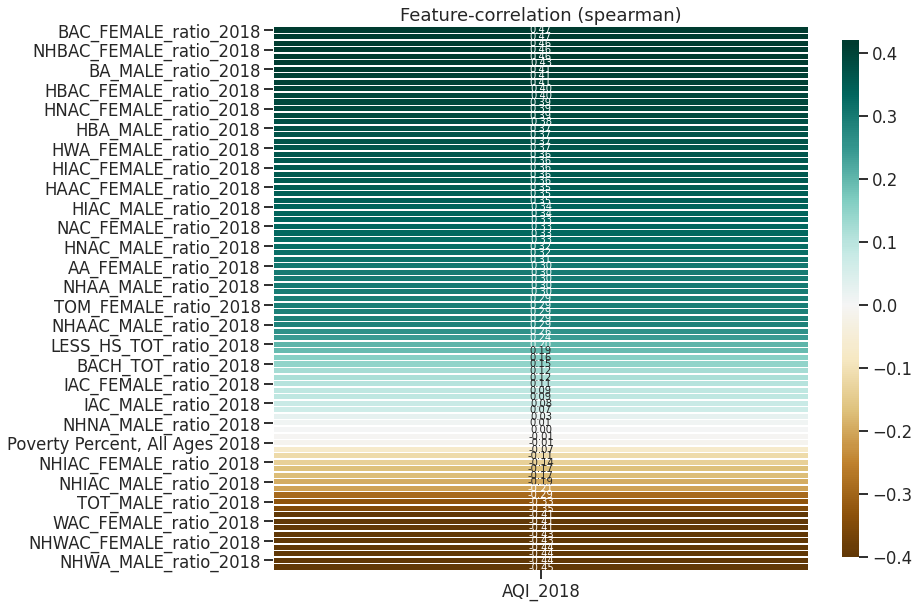

In [11]:
klib.corr_plot(df_2018, target='AQI_2018', method='pearson')
klib.corr_plot(df_2018, target='AQI_2018', method='kendall')
klib.corr_plot(df_2018, target='AQI_2018', method='spearman')

## Try make one df of 2019
* Cleaning for datasets were done in Data_Wrangling4 and Data_Wrangling7 files
* So only transforming datasets into one will work

In [12]:
avg_NE_aqi_2019 = avg_NE_aqi_2017_2019.iloc[:,[0, 1, 2, 5]]
NE_unemploy_rate_2019 = NE_unemploy_rate_2017_2019.iloc[:, [0, 5]]
NE_pov_ratio_2019 = NE_pov_ratio_2017_2019.iloc[:, [0, 5]]

educ_vehicle_2019_col = list(NE_educ_vehicle_2017_2019.columns[0:1]) + list(NE_educ_vehicle_2017_2019.columns[18:25])
NE_educ_vehicle_2019 = NE_educ_vehicle_2017_2019.loc[:, educ_vehicle_2019_col]

dem_ratio_2019_col = list(NE_dem_ratio_2017_2019.columns[0:1]) + list(NE_dem_ratio_2017_2019.columns[149:222])
NE_dem_ratio_2019 = NE_dem_ratio_2017_2019.loc[:, dem_ratio_2019_col]

In [13]:
NE_avg_aqi_unemploy_2019 = pd.merge(avg_NE_aqi_2019, NE_unemploy_rate_2019, how='inner')
NE_avg_aqi_unemploy_pov_2019 = pd.merge(NE_avg_aqi_unemploy_2019, NE_pov_ratio_2019, how='inner')
NE_avg_aqi_unemploy_pov_educ_veh_2019 = pd.merge(NE_avg_aqi_unemploy_pov_2019, NE_educ_vehicle_2019, how='inner')
df_2019 = pd.merge(NE_avg_aqi_unemploy_pov_educ_veh_2019, NE_dem_ratio_2019, how='inner')

df_2019

,GeoFIPS,State Name,county Name,AQI_2019,Unemployment_rate_2019,"Poverty Percent, All Ages 2019",EDU_TOT_ratio_2019,LESS_HS_TOT_ratio_2019,HS_TOT_ratio_2019,COL_OR_ASSOC_TOT_ratio_2019,...,HWAC_MALE_ratio_2019,HWAC_FEMALE_ratio_2019,HBAC_MALE_ratio_2019,HBAC_FEMALE_ratio_2019,HIAC_MALE_ratio_2019,HIAC_FEMALE_ratio_2019,HAAC_MALE_ratio_2019,HAAC_FEMALE_ratio_2019,HNAC_MALE_ratio_2019,HNAC_FEMALE_ratio_2019
0,9001,Connecticut,Fairfield,46.495890,3.6,9.0,68.657058,6.762094,15.020481,13.185602,...,9.077186,8.966514,1.128341,1.183995,0.319082,0.286113,0.119788,0.099647,0.077173,0.059682
1,9003,Connecticut,Hartford,41.490411,3.9,10.8,70.160925,6.844413,17.982663,18.000493,...,7.626834,7.970103,1.458642,1.633585,0.303234,0.315458,0.137711,0.124815,0.069304,0.052819
2,9005,Connecticut,Litchfield,38.564384,3.5,7.1,75.031192,4.716829,23.004109,20.239779,...,3.141965,3.005551,0.454714,0.417561,0.167468,0.144732,0.053789,0.051017,0.030499,0.022736
3,9007,Connecticut,Middlesex,44.487805,3.2,7.0,73.607452,4.843754,19.643429,17.634638,...,2.782019,2.829422,0.419858,0.471570,0.088035,0.112044,0.056022,0.052944,0.029550,0.032013
4,9009,Connecticut,New Haven,46.090411,3.9,12.0,70.274710,7.430884,21.509622,16.639349,...,8.058080,8.240939,1.302943,1.452343,0.285812,0.297628,0.097104,0.095115,0.048786,0.047733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,42133,Pennsylvania,York,41.761644,3.8,9.2,70.040618,6.988184,26.644220,17.917285,...,3.301133,3.162175,0.806355,0.775401,0.172583,0.157218,0.057899,0.059458,0.029172,0.027836
122,44003,Rhode Island,Kent,31.544160,3.2,8.1,74.488715,6.073942,21.721691,22.491053,...,2.382344,2.328172,0.396246,0.375551,0.146690,0.139995,0.071215,0.078519,0.057215,0.029825
123,44007,Rhode Island,Providence,43.443836,3.9,14.0,69.112158,9.560344,20.730877,18.238276,...,9.502122,9.250608,2.183804,2.288510,0.617907,0.629645,0.172319,0.165589,0.120357,0.120357
124,44009,Rhode Island,Washington,32.991477,3.1,8.0,70.656251,3.307134,16.836682,16.041950,...,1.399142,1.528942,0.194303,0.179969,0.129801,0.131393,0.049372,0.043002,0.018315,0.019908


* df_2019 contains data on NorthEastern counties of the US
* The columns of df_2019 go from average aqi, unemployment rate, poverty rate, education attainment ratio, total vehicle ratio, demographic ratios

<AxesSubplot:title={'center':'Feature-correlation (spearman)'}>

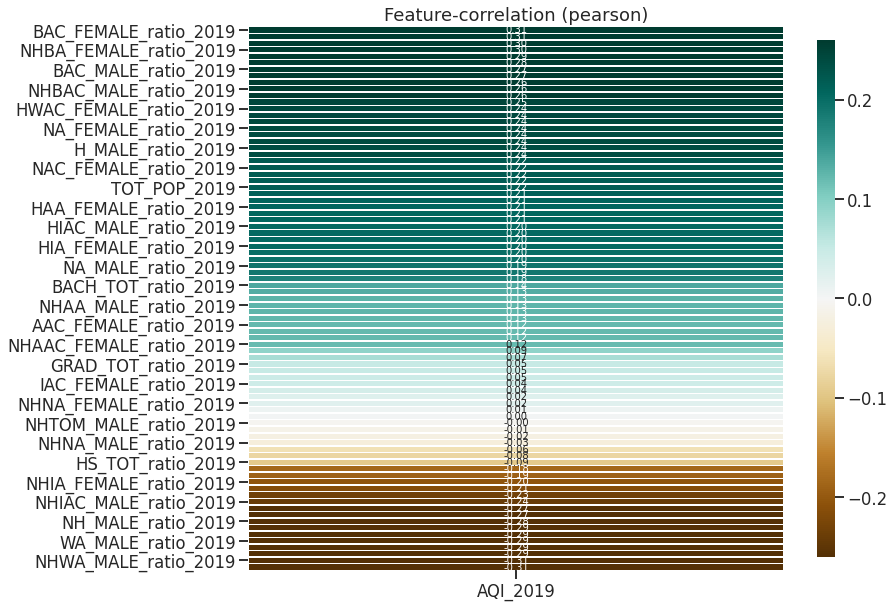

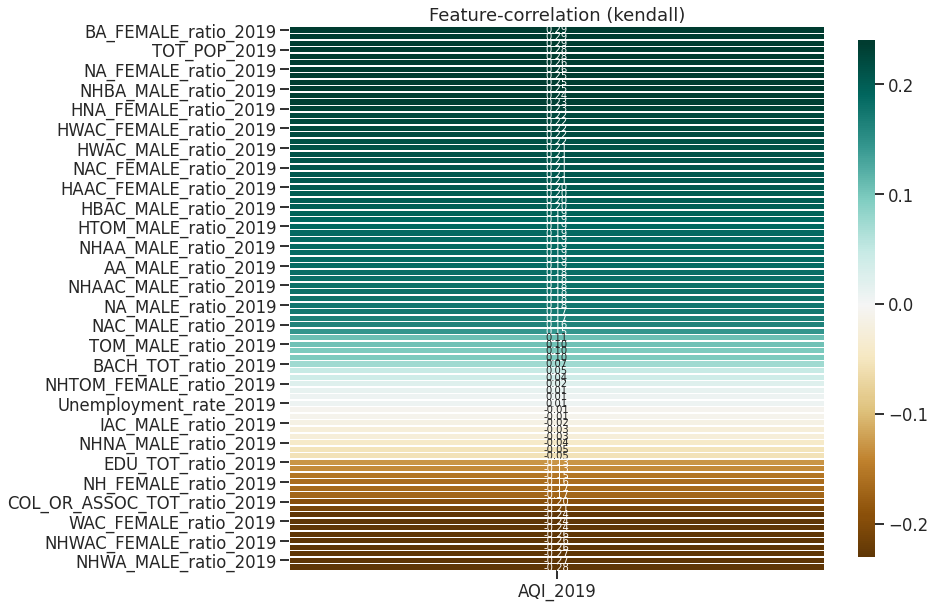

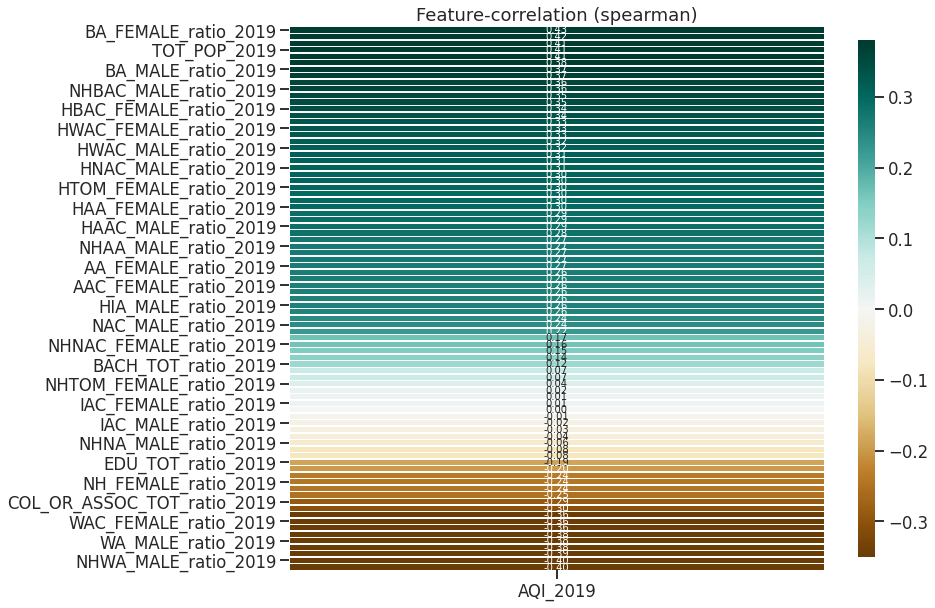

In [14]:
klib.corr_plot(df_2019, target='AQI_2019', method='pearson')
klib.corr_plot(df_2019, target='AQI_2019', method='kendall')
klib.corr_plot(df_2019, target='AQI_2019', method='spearman')

# Merge dataframe into df 2017-2019

In [15]:
pd.set_option('display.max_columns', 200)

df_2017_2018 = pd.merge(df_2017, df_2018, how='inner')
df_2017_2019 = pd.merge(df_2017_2018, df_2019, how='inner')

df_2017_2019

,GeoFIPS,State Name,county Name,AQI_2017,Unemployment_rate_2017,"Poverty Percent, All Ages 2017",EDU_TOT_ratio_2017,LESS_HS_TOT_ratio_2017,HS_TOT_ratio_2017,COL_OR_ASSOC_TOT_ratio_2017,BACH_TOT_ratio_2017,GRAD_TOT_ratio_2017,VEHICLE_TOT_ratio_2017,TOT_POP_2017,TOT_MALE_ratio_2017,TOT_FEMALE_ratio_2017,WA_MALE_ratio_2017,WA_FEMALE_ratio_2017,BA_MALE_ratio_2017,BA_FEMALE_ratio_2017,IA_MALE_ratio_2017,IA_FEMALE_ratio_2017,AA_MALE_ratio_2017,AA_FEMALE_ratio_2017,NA_MALE_ratio_2017,NA_FEMALE_ratio_2017,TOM_MALE_ratio_2017,TOM_FEMALE_ratio_2017,WAC_MALE_ratio_2017,WAC_FEMALE_ratio_2017,BAC_MALE_ratio_2017,BAC_FEMALE_ratio_2017,IAC_MALE_ratio_2017,IAC_FEMALE_ratio_2017,AAC_MALE_ratio_2017,AAC_FEMALE_ratio_2017,NAC_MALE_ratio_2017,NAC_FEMALE_ratio_2017,NH_MALE_ratio_2017,NH_FEMALE_ratio_2017,NHWA_MALE_ratio_2017,NHWA_FEMALE_ratio_2017,NHBA_MALE_ratio_2017,NHBA_FEMALE_ratio_2017,NHIA_MALE_ratio_2017,NHIA_FEMALE_ratio_2017,NHAA_MALE_ratio_2017,NHAA_FEMALE_ratio_2017,NHNA_MALE_ratio_2017,NHNA_FEMALE_ratio_2017,NHTOM_MALE_ratio_2017,NHTOM_FEMALE_ratio_2017,NHWAC_MALE_ratio_2017,NHWAC_FEMALE_ratio_2017,NHBAC_MALE_ratio_2017,NHBAC_FEMALE_ratio_2017,NHIAC_MALE_ratio_2017,NHIAC_FEMALE_ratio_2017,NHAAC_MALE_ratio_2017,NHAAC_FEMALE_ratio_2017,NHNAC_MALE_ratio_2017,NHNAC_FEMALE_ratio_2017,H_MALE_ratio_2017,H_FEMALE_ratio_2017,HWA_MALE_ratio_2017,HWA_FEMALE_ratio_2017,HBA_MALE_ratio_2017,HBA_FEMALE_ratio_2017,HIA_MALE_ratio_2017,HIA_FEMALE_ratio_2017,HAA_MALE_ratio_2017,HAA_FEMALE_ratio_2017,HNA_MALE_ratio_2017,HNA_FEMALE_ratio_2017,HTOM_MALE_ratio_2017,HTOM_FEMALE_ratio_2017,HWAC_MALE_ratio_2017,HWAC_FEMALE_ratio_2017,HBAC_MALE_ratio_2017,HBAC_FEMALE_ratio_2017,HIAC_MALE_ratio_2017,HIAC_FEMALE_ratio_2017,HAAC_MALE_ratio_2017,HAAC_FEMALE_ratio_2017,HNAC_MALE_ratio_2017,HNAC_FEMALE_ratio_2017,AQI_2018,Unemployment_rate_2018,"Poverty Percent, All Ages 2018",EDU_TOT_ratio_2018,LESS_HS_TOT_ratio_2018,HS_TOT_ratio_2018,COL_OR_ASSOC_TOT_ratio_2018,BACH_TOT_ratio_2018,GRAD_TOT_ratio_2018,VEHICLE_TOT_ratio_2018,TOT_POP_2018,TOT_MALE_ratio_2018,TOT_FEMALE_ratio_2018,WA_MALE_ratio_2018,...,HIA_FEMALE_ratio_2018,HAA_MALE_ratio_2018,HAA_FEMALE_ratio_2018,HNA_MALE_ratio_2018,HNA_FEMALE_ratio_2018,HTOM_MALE_ratio_2018,HTOM_FEMALE_ratio_2018,HWAC_MALE_ratio_2018,HWAC_FEMALE_ratio_2018,HBAC_MALE_ratio_2018,HBAC_FEMALE_ratio_2018,HIAC_MALE_ratio_2018,HIAC_FEMALE_ratio_2018,HAAC_MALE_ratio_2018,HAAC_FEMALE_ratio_2018,HNAC_MALE_ratio_2018,HNAC_FEMALE_ratio_2018,AQI_2019,Unemployment_rate_2019,"Poverty Percent, All Ages 2019",EDU_TOT_ratio_2019,LESS_HS_TOT_ratio_2019,HS_TOT_ratio_2019,COL_OR_ASSOC_TOT_ratio_2019,BACH_TOT_ratio_2019,GRAD_TOT_ratio_2019,VEHICLE_TOT_ratio_2019,TOT_POP_2019,TOT_MALE_ratio_2019,TOT_FEMALE_ratio_2019,WA_MALE_ratio_2019,WA_FEMALE_ratio_2019,BA_MALE_ratio_2019,BA_FEMALE_ratio_2019,IA_MALE_ratio_2019,IA_FEMALE_ratio_2019,AA_MALE_ratio_2019,AA_FEMALE_ratio_2019,NA_MALE_ratio_2019,NA_FEMALE_ratio_2019,TOM_MALE_ratio_2019,TOM_FEMALE_ratio_2019,WAC_MALE_ratio_2019,WAC_FEMALE_ratio_2019,BAC_MALE_ratio_2019,BAC_FEMALE_ratio_2019,IAC_MALE_ratio_2019,IAC_FEMALE_ratio_2019,AAC_MALE_ratio_2019,AAC_FEMALE_ratio_2019,NAC_MALE_ratio_2019,NAC_FEMALE_ratio_2019,NH_MALE_ratio_2019,NH_FEMALE_ratio_2019,NHWA_MALE_ratio_2019,NHWA_FEMALE_ratio_2019,NHBA_MALE_ratio_2019,NHBA_FEMALE_ratio_2019,NHIA_MALE_ratio_2019,NHIA_FEMALE_ratio_2019,NHAA_MALE_ratio_2019,NHAA_FEMALE_ratio_2019,NHNA_MALE_ratio_2019,NHNA_FEMALE_ratio_2019,NHTOM_MALE_ratio_2019,NHTOM_FEMALE_ratio_2019,NHWAC_MALE_ratio_2019,NHWAC_FEMALE_ratio_2019,NHBAC_MALE_ratio_2019,NHBAC_FEMALE_ratio_2019,NHIAC_MALE_ratio_2019,NHIAC_FEMALE_ratio_2019,NHAAC_MALE_ratio_2019,NHAAC_FEMALE_ratio_2019,NHNAC_MALE_ratio_2019,NHNAC_FEMALE_ratio_2019,H_MALE_ratio_2019,H_FEMALE_ratio_2019,HWA_MALE_ratio_2019,HWA_FEMALE_ratio_2019,HBA_MALE_ratio_2019,HBA_FEMALE_ratio_2019,HIA_MALE_ratio_2019,HIA_FEMALE_ratio_2019,HAA_MALE_ratio_2019,HAA_FEMALE_ratio_2019,HNA_MALE_ratio_2019,HNA_FEMALE_ratio_2019,HTOM_MALE_ratio_2019,HTOM_

# save data


In [16]:
data_path = r'../../data/processed/df_2017_2019'
df_2017_2019.to_csv(data_path, index=False)

